# Cleaning and Analyzing Employee Exit Surveys

## Introduction

In this project, we will be looking at exit surveys from employees at the Department of Education, Training and Employment (DETE), and the Technical and Further Education Institute (TAFE) in Queensland, Australia.

We will be aiming to find the reasons behind why employees leave, and will be looking at the various factors (age of employee, duration of employment, etc.) in order to do so.

The dataset consists of two csv files, one for DETE (dete_survey.csv), and the other for TEFE (tafe_survey.csv). The two surveys will have to be combined in order to find the answers we are looking for.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.head(5))
print("\n")
print(dete_survey.isnull().sum())
print("\n")
print(dete_survey['Region'].value_counts())
print("\n")
dete_survey.info()

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

The DETE survey consists of 822 entries, with the majority of null values in the Classification, Business Unit, Aboriginal, Torres Strait, South Sea, Disbaility, and NESB columns. The highest number of exit surveys were taken by employees from the Metropolitan region.

In [2]:
print(tafe_survey.head(5))
print("\n")
print(tafe_survey.isnull().sum())
print("\n")
print(tafe_survey['Institute'].value_counts())
print("\n")
tafe_survey.info()

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

The TAFE survey consists of 702 entries, with the most null values being in the column: 'Main Factor. Which of these was the main factor for leaving?'. This is an important column for or analysis, so this issue will have to be addressed. The highest number of exit surveys were taken by employees from the Brisbane North Institute of TAFE.

## Cleaning Datasets

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In the DETE survey, some missing values were stated as 'Not Stated' instead of NaN. To change this, we read in the dete_survey using pd.read_csv, and declared the na_values parameter as 'Not Stated'. The DETE survey also had a lot of columns that were not needed for our analysis, so we used the DataFrame.drop() method to remove those unwanted columns. This was the same case for the TAFE survey, so we used the DataFrame.drop() method once again.

In [4]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_').str.replace('\s+','')
dete_survey_updated.columns




Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [5]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype','Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age','Employment Type. Employment Type':'employment_status','Classification. Classification':'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'})
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The column names are now the same for the two surveys, which will allow us to better work with the data.

## Filtering Data

In [8]:
dete_survey_updated['separationtype'].value_counts()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated['separationtype'].value_counts()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In the DETE and TAFE surveys, we want to look at employees who have resigned, and not left for other reasons (i.e. Retirement). In order to do this, we select employees whose entry in the separation type is equal to or contains the word 'Resignation' (the DETE survey contains three separation types).

In [10]:
print(dete_resignations['cease_date'].value_counts())
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})', expand = False).astype(float).copy()
dete_resignations['cease_date']

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64


3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [11]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [12]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [13]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

From looking at the start and end dates in the DETE survey, we can see the earliest start date is 1963, and the latest end date is 2013. The latest end date in the TAFE survey is 2013 as well. The cease_date column in the DETE survey also had some missing values, which is something to note.

In [14]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0


The TAFE dataframe contains a service column, which indicates the time spent at working, while the DETE dataframe does not. To fix this issue, we added a new column named 'institute_service', and calculated the time spent working by subtracting the 'dete_start_date' from the 'cease_date'.

In [15]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [16]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [17]:
def update_vals(value):
    if pd.isnull(value) == True:
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [18]:
diss_tafe = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations['dissatisfied'] = diss_tafe.any(axis = 1, skipna = False)
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [19]:
diss_dete = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
dete_resignations['dissatisfied'] = diss_dete.any(axis = 1, skipna = False)
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [20]:
dete_resignations_up = dete_resignations.copy()

In [21]:
tafe_resignations_up = tafe_resignations.copy()

In order to figure out which employees were dissatisfied, we will check columns related to dissatisfaction in both surveys, convert them to True, False, or Nan values, and take True values to mean they are dissatisfied.

In the tafe dataframe, we used the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns. 

In the dete dataframe, we used the following columns:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

We created a new column in each dataframe named 'dissatisfied' which allows us to compare the two datasets, and combine them.


## Combining the Data

In [22]:
dete_resignations_up['institute'] = 'DETE'
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True,DETE
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,False,DETE
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,False,DETE


In [23]:
tafe_resignations_up['institute'] = 'TAFE'
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False,TAFE
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False,TAFE
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False,TAFE
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False,TAFE
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True,TAFE


In [24]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up])
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation-Move overseas/interstate
12,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation-Other reasons
14,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation-Other employer
16,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons
20,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation-Other employer
21,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation-Other reasons


Before combining the dataframes, we want to differentiate between the two institutes, so we added a column called 'institute' that contains the value 'DETE' or 'TAFE'. After combining, we drop columns we dont need using the drop.na() method and stating 500 non-null values as our thresh parameter. 

### Analysing Service Category vs Dissatisfaction

In [25]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)




/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [26]:
def careerstage(years):
    if years < 3:
        return 'New'
    elif 3 <= years < 7:
        return 'Experienced'
    elif 7 <= years < 11:
        return "Established"
    elif years >= 11:
        return "Veteran"
    elif pd.isnull(years) == True:
        return np.nan
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(careerstage)
combined_updated['service_cat'].value_counts()

    
    

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

From the institute_service column, we extracted the digits into a new column. We then made a function that classifies an employee based on the number of years worked, and used the apply method to the new column. We can see that the highest group of employees are classified as 'new' (less than 3 years worked).

In [27]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

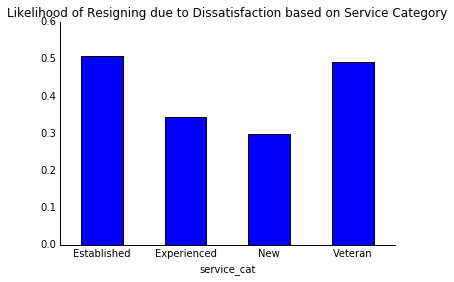

In [66]:
cat_dist = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
catdist_graph = cat_dist.plot(kind = 'bar', rot = 0, legend = False)
catdist_graph.set_title('Likelihood of Resigning due to Dissatisfaction based on Service Category')
catdist_graph.tick_params(top = 'off', left = 'off', bottom = 'off', right = 'off')
catdist_graph.spines['top'].set_visible(False)
catdist_graph.spines['right'].set_visible(False)
plt.show()

We used the fillna method to replace Na values with the most frequent value in the column, and plotted the distribution of employees who are dissatisfied among the different levels of service (veteran, new, etc.). We can see that established (7-10 yrs) and veteran (11+ years) are the two groups that have reported dissatisfaction the most. 

### Handle Missing Data

In [30]:
((combined_updated.isnull().sum()/combined_updated.notnull().sum())*100).sort_values()

dissatisfied             0.000000
id                       0.000000
institute                0.000000
separationtype           0.000000
cease_date               2.519685
position                 8.862876
employment_status        9.045226
age                      9.228188
gender                   9.966216
institute_service       15.630551
institute_service_up    15.630551
service_cat             15.630551
dtype: float64

Seeing as how the columns with missing values do not exceed more than 15-16% of the total values in a column, we can remove the missing values without drastically affecting our analysis.

In [31]:
combined_updated = combined_updated.dropna(axis = 0).copy()
combined_updated.isnull().sum()

age                     0
cease_date              0
dissatisfied            0
employment_status       0
gender                  0
id                      0
institute               0
institute_service       0
position                0
separationtype          0
institute_service_up    0
service_cat             0
dtype: int64

In [32]:
combined_updated['service_cat'].value_counts()

New            191
Experienced    171
Veteran        128
Established     61
Name: service_cat, dtype: int64

After removing rows with missing values, and looking at the unique values in the 'service_cat' column, we can see that only 12 rows have been removed.

### Cleaning the 'Age' Column

In [33]:
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            26
26  30           32
26-30            31
31  35           32
31-35            28
36  40           31
36-40            35
41  45           45
41-45            44
46  50           39
46-50            33
51-55            67
56 or older      28
56-60            21
61 or older      16
Name: age, dtype: int64

In [34]:
combined_updated['age'] = combined_updated['age'].str.replace('  ','-').str.replace('20 or younger','25 or younger').str.replace('21-25','25 or younger').str.replace('-60',' or older').str.replace('61 or older','56 or older')
combined_updated['age'].value_counts().sort_index()    

25 or younger    69
26-30            63
31-35            60
36-40            66
41-45            89
46-50            72
51-55            67
56 or older      65
Name: age, dtype: int64

To get a better understanding of what age of employees are dissatisfied, we cleaned the age column.

### Analysing Age vs Dissatisfaction

In [35]:
agedist = combined_updated.pivot_table(values = 'dissatisfied', index = 'age')
agedist

,dissatisfied
age,
25 or younger,0.275362
26-30,0.412698
31-35,0.383333
36-40,0.363636
41-45,0.393258
46-50,0.402778
51-55,0.402985
56 or older,0.415385


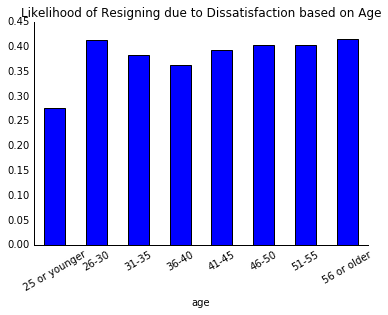

In [63]:
agedist_graph = agedist.plot(kind = 'bar', rot = 30,  legend = False)
agedist_graph.set_title('Likelihood of Resigning due to Dissatisfaction based on Age')
agedist_graph.tick_params(top = 'off', left = 'off', bottom = 'off', right = 'off')
agedist_graph.spines['top'].set_visible(False)
agedist_graph.spines['right'].set_visible(False)
plt.show()

From plotting the pivot table comparing dissatisfaction amongst age groups, we can see that employees aged 25 or younger have the lowest rate of dissatisfaction, wheras the rest of the age groups are fairly similar.

## Conclusion

From looking at levels of dissatisfaction amongst different service categories, and amongst different age groups, we can see that the general trend is that the longer the amount of time an employee spends working at DETE or TAFE, the higher the likelihood they are dissatisfied in some aspect, which leads to their resignation.